In [3]:
import pandas as pd
#data collection
df = pd.read_csv('dataset_phishing.csv')

df.head()

#data pre-processing 
if 'url' in df.columns:
    df.drop(columns='url',inplace=True)

df['status'] = df['status'].map({'phishing':1, 'legitimate':0})

df_clean = df.dropna()

df_clean.to_csv("phishing_data.csv",index=False)

df_clean.head()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


status                1.000000
google_index          0.731171
ratio_digits_url      0.356395
domain_in_title       0.342807
phish_hints           0.335393
ip                    0.321698
nb_qm                 0.294319
length_url            0.248580
nb_slash              0.242270
length_hostname       0.238322
nb_eq                 0.233386
ratio_digits_host     0.224335
shortest_word_host    0.223084
prefix_suffix         0.214681
longest_word_path     0.212709
tld_in_subdomain      0.208884
empty_title           0.207043
nb_dots               0.207029
longest_words_raw     0.200147
avg_word_path         0.197256
Name: status, dtype: float64
nb_hyphens                   -0.100107
ratio_extMedia               -0.140406
external_favicon             -0.146565
ratio_extRedirection         -0.150827
domain_registration_length   -0.161719
domain_with_copyright        -0.173098
safe_anchor                  -0.173397
links_in_tags                -0.184401
ratio_intMedia               -0.193333


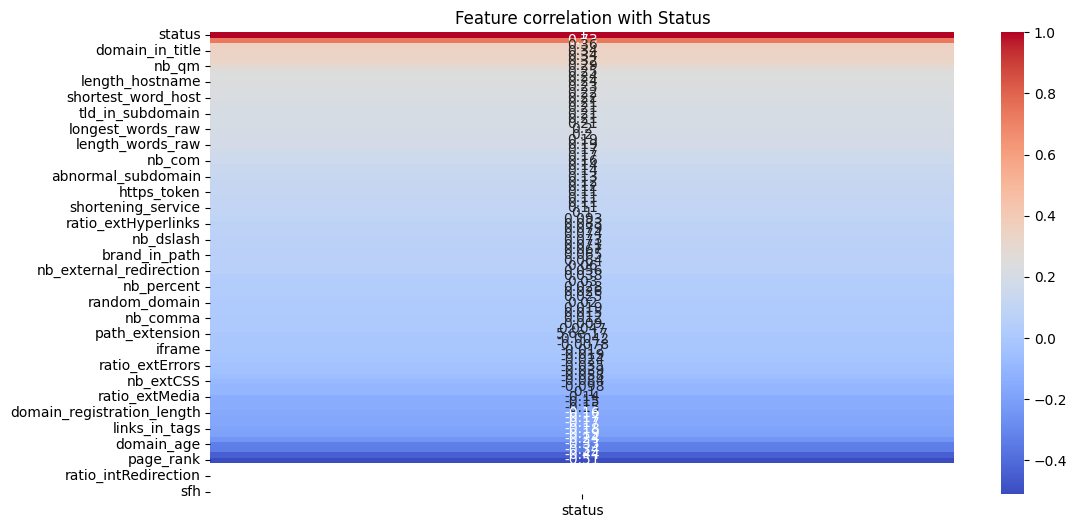

In [4]:
#finding correlation as in how the status is correlated with other features
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)

target_corr = corr['status'].sort_values(ascending=False)
print(target_corr.head(20)) 
print(target_corr.tail(20)) 

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr[['status']].sort_values(by='status', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature correlation with Status")
plt.show()


google_index            0.169744
page_rank               0.100367
nb_hyperlinks           0.087397
web_traffic             0.073052
domain_age              0.038080
nb_www                  0.037966
phish_hints             0.029911
ratio_intHyperlinks     0.028965
longest_word_path       0.026592
safe_anchor             0.023949
ratio_extHyperlinks     0.023629
ratio_digits_url        0.019259
ratio_extRedirection    0.018042
length_url              0.016660
avg_word_path           0.015603
longest_words_raw       0.015139
length_words_raw        0.014894
shortest_word_host      0.014563
length_hostname         0.014563
char_repeat             0.014384
dtype: float64


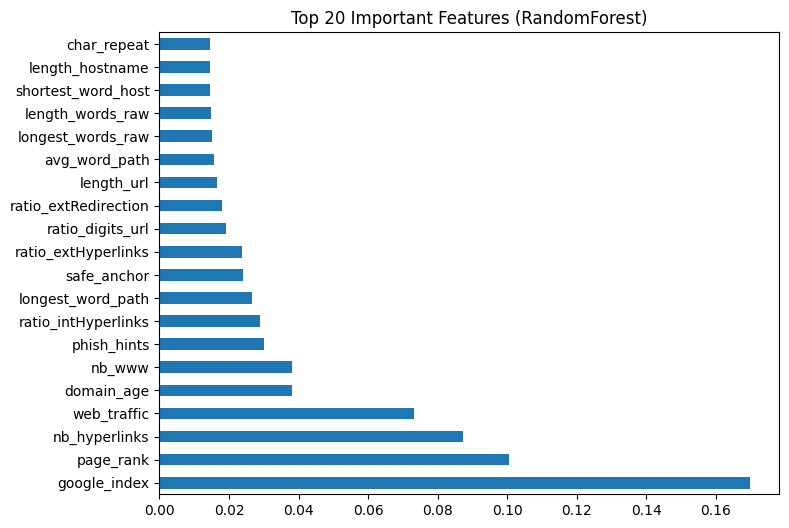

In [5]:
# Feature Importance using RandomForest
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['status'])
y = df['status']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)
print(top_features)

# Plot
top_features.plot(kind='barh', figsize=(8,6))
plt.title("Top 20 Important Features (RandomForest)")
plt.show()

In [6]:
# Statistical Tests: Chi-Square and ANOVA
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

# Chi-square
chi_vals, chi_p = chi2(X_scaled, y)
chi2_results = pd.Series(chi_vals, index=X.columns).sort_values(ascending=False)
print("Top features by Chi-Square:\n", chi2_results.head(20))

# ANOVA F-test
f_vals, f_p = f_classif(X, y)
anova_results = pd.Series(f_vals, index=X.columns).sort_values(ascending=False)
print("Top features by ANOVA:\n", anova_results.head(20))


Top features by Chi-Square:
 google_index             2847.871702
ip                       1004.779198
nb_www                    631.285213
page_rank                 603.251699
tld_in_subdomain          473.719023
empty_title               428.838710
prefix_suffix             420.136560
nb_qm                     310.424618
ratio_digits_url          301.381630
domain_in_title           301.077582
phish_hints               278.507742
ratio_digits_host         250.760241
domain_age                231.578842
statistical_report        217.441435
ratio_intMedia            213.149404
domain_with_copyright     191.943471
abnormal_subdomain        183.680162
dns_record                167.026087
ratio_intHyperlinks       160.054949
ratio_extMedia            142.879750
dtype: float64
Top features by ANOVA:
 google_index           13127.790864
page_rank               4041.608047
nb_www                  2797.671656
ratio_digits_url        1662.748816
domain_in_title         1521.818964
nb_hyperlink

d:\Python\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Python\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [7]:
# Dimensionality Reduction using PCA(Skippable this if not needed)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("Reduced features with PCA:", X_pca.shape[1])


Original features: 87
Reduced features with PCA: 60


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

X = df.drop(columns=['status'])
y = df['status']
#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_top30 = rf_importances.sort_values(ascending=False).head(30).index.tolist()
#Chi2
X_scaled = MinMaxScaler().fit_transform(X)  # scale for chi2
chi_vals, chi_p = chi2(X_scaled, y)
chi2_results = pd.Series(chi_vals, index=X.columns)
chi2_top30 = chi2_results.sort_values(ascending=False).head(30).index.tolist()
#Anova
f_vals, f_p = f_classif(X, y)
anova_results = pd.Series(f_vals, index=X.columns)
anova_top30 = anova_results.sort_values(ascending=False).head(30).index.tolist()
# Combine
selected_features = list(set(rf_top30 + chi2_top30 + anova_top30))
print(f"Total selected features: {len(selected_features)}")
print("Selected Features:", selected_features)

X_selected = X[selected_features]

print("Original shape:", X.shape)
print("Reduced shape:", X_selected.shape)

Total selected features: 48
Selected Features: ['avg_word_path', 'length_hostname', 'domain_in_title', 'tld_in_subdomain', 'ratio_intHyperlinks', 'domain_with_copyright', 'nb_eq', 'page_rank', 'safe_anchor', 'shortening_service', 'nb_and', 'nb_slash', 'ratio_extMedia', 'ratio_extRedirection', 'longest_word_path', 'char_repeat', 'abnormal_subdomain', 'links_in_tags', 'statistical_report', 'nb_dots', 'domain_in_brand', 'ip', 'web_traffic', 'ratio_digits_url', 'domain_age', 'suspecious_tld', 'ratio_digits_host', 'nb_qm', 'ratio_intMedia', 'length_url', 'ratio_extHyperlinks', 'google_index', 'prefix_suffix', 'tld_in_path', 'external_favicon', 'domain_registration_length', 'nb_www', 'shortest_word_host', 'length_words_raw', 'avg_words_raw', 'empty_title', 'nb_hyphens', 'nb_hyperlinks', 'avg_word_host', 'longest_words_raw', 'phish_hints', 'dns_record', 'shortest_word_path']
Original shape: (11430, 87)
Reduced shape: (11430, 48)


d:\Python\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Python\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [9]:
#Train-test split
from sklearn.model_selection import train_test_split

X = df[selected_features]
Y = df['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train shape:{X_train.shape}, X_test shape:{X_test.shape}, Y_train shape:{Y_train.shape}, Y_test shape:{Y_test.shape}")

X_train shape:(9144, 48), X_test shape:(2286, 48), Y_train shape:(9144,), Y_test shape:(2286,)


In [12]:
#Support vector classifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_clf = Pipeline([('scaler',StandardScaler()),('clf',SVC(kernel='rbf',probability=True, random_state=42))])
svm_clf.fit(X_train,Y_train)

svm_pred = svm_clf.predict(X_test)

#Accuracy Worst
print("SVM Accuracy:", accuracy_score(Y_test, svm_pred) * 100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, svm_pred))
print("Classification Report:\n", classification_report(Y_test, svm_pred))

print("Prediction: ",svm_pred)

SVM Accuracy: 96.71916010498688
Confusion Matrix:
 [[1126   31]
 [  44 1085]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

Prediction:  [0 0 0 ... 1 0 1]


In [9]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)

rfc_pred = rf.predict(X_test)

#Accuracy Best
print("Random Forest Accuracy:", accuracy_score(Y_test, rfc_pred) * 100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, rfc_pred))
print("Classification Report:\n", classification_report(Y_test, rfc_pred))

print("Prediction: ",rfc_pred)

Random Forest Accuracy: 96.58792650918635
Confusion Matrix:
 [[1126   31]
 [  47 1082]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

Prediction:  [0 0 0 ... 1 0 1]


In [13]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ens_clf = VotingClassifier(estimators=[('SVM',svm_clf),('RFC',rf)], voting='hard')
ens_clf.fit(X_train, Y_train)

ens_pred = ens_clf.predict(X_test)

#Accuracy Average
print("Ensemble Model Accuracy:", accuracy_score(Y_test, ens_pred) * 100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, ens_pred))
print("Classification Report:\n", classification_report(Y_test, ens_pred))

print("Prediction: ",ens_pred)

Ensemble Model Accuracy: 96.45669291338582
Confusion Matrix:
 [[1140   17]
 [  64 1065]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1157
           1       0.98      0.94      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.97      0.96      0.96      2286
weighted avg       0.97      0.96      0.96      2286

Prediction:  [0 0 0 ... 1 0 1]


In [14]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train,Y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(Y_test, gb_pred) * 100)
print("Confusion matrix:\n", confusion_matrix(Y_test, gb_pred))
print("Classification Report:\n",classification_report(Y_test,gb_pred))

print("Prediction:", gb_pred)

Gradient Boosting Accuracy: 95.88801399825022
Confusion matrix:
 [[1107   50]
 [  44 1085]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286

Prediction: [0 0 0 ... 1 0 1]


In [16]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
log_reg = Pipeline([("Scaler",StandardScaler()),("clf",LogisticRegression(max_iter=200, random_state=42))])
log_reg.fit(X_train,Y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, log_reg_pred) * 100)
print("Confusion matrix:\n", confusion_matrix(Y_test, log_reg_pred))
print("Classification Report:\n", classification_report(Y_test, log_reg_pred))

print("Prediction:", log_reg_pred)

Logistic Regression Accuracy: 94.57567804024497
Confusion matrix:
 [[1095   62]
 [  62 1067]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1157
           1       0.95      0.95      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286

Prediction: [0 0 0 ... 1 0 1]


In [17]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([("Scaler",StandardScaler()),("clf",KNeighborsClassifier(n_neighbors=5))])

knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(Y_test, knn_pred) * 100)
print("Confusion matrix:\n", confusion_matrix(Y_test, knn_pred))
print("Classification Report:\n", classification_report(Y_test, knn_pred))

print("Prediction:", knn_pred)

KNN Accuracy: 95.14435695538059
Confusion matrix:
 [[1116   41]
 [  70 1059]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1157
           1       0.96      0.94      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286

Prediction: [0 0 0 ... 1 0 1]


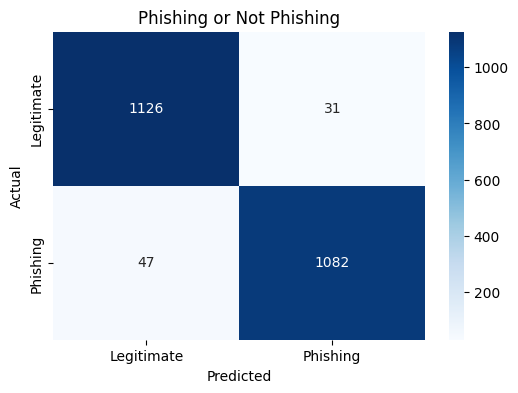

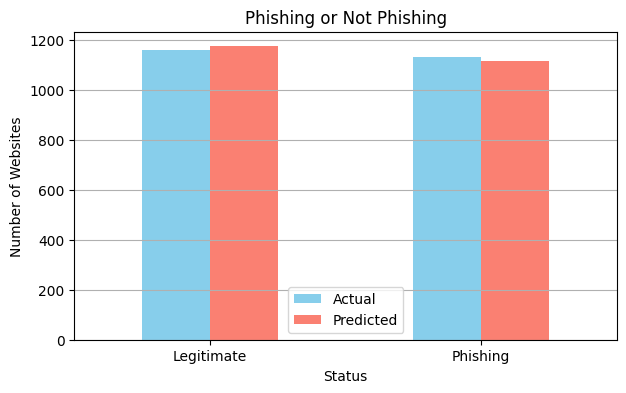

In [10]:
#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

#Heatmap
y_pred = rf.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Phishing or Not Phishing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#BarGraph
actual_counts = pd.Series(Y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})
comparison_df.index = ['Legitimate', 'Phishing']

comparison_df.plot(kind='bar', figsize=(7, 4), color=['skyblue', 'salmon'])
plt.title('Phishing or Not Phishing')
plt.ylabel('Number of Websites')
plt.xlabel('Status')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

models = {
    "Random Forest": rf,       
    "Gradient Boosting": gb,    
    "Logistic Regression": log_reg,
    "SVM": svm_clf,
    "KNN": knn,
    "Voting Classifier": ens_clf
}
results = []
for name, model in models.items():
    y_pred = model.predict(X_test) 
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred, average='weighted')
    rec = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted') 
    composite_score = (acc + f1 + prec + rec) / 4
    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-score": f1,
        "Precision": prec,
        "Recall": rec,
        "Composite Score": composite_score})

df_metrics = pd.DataFrame(results)

df_metrics = df_metrics.sort_values(by="Composite Score", ascending=False).reset_index(drop=True)

print(df_metrics)

                 Model  Accuracy  F1-score  Precision    Recall  \
0                  SVM  0.967192  0.967188   0.967247  0.967192   
1        Random Forest  0.965879  0.965875   0.965965  0.965879   
2    Voting Classifier  0.964567  0.964543   0.965337  0.964567   
3    Gradient Boosting  0.958880  0.958881   0.958895  0.958880   
4                  KNN  0.951444  0.951428   0.951719  0.951444   
5  Logistic Regression  0.945757  0.945757   0.945757  0.945757   

   Composite Score  
0         0.967205  
1         0.965899  
2         0.964753  
3         0.958884  
4         0.951509  
5         0.945757  


In [23]:
#I am biased towards Random Forest Classifier kekw
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,              
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=3,
    random_state=42
)

random_search.fit(X_train, Y_train)
best_rf = random_search.best_estimator_
print(random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [24]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[('rf', best_rf), ('gb', gb)],
    voting='soft'
)
ensemble.fit(X_train, Y_train)
ensemble_pred = ensemble.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, ensemble_pred))
print("Precision:", precision_score(Y_test, ensemble_pred))
print("Recall:", recall_score(Y_test, ensemble_pred))
print("F1-score:", f1_score(Y_test, ensemble_pred))
print("Composite Score:", (accuracy_score(Y_test, ensemble_pred) + f1_score(Y_test, ensemble_pred) + precision_score(Y_test, ensemble_pred) + recall_score(Y_test, ensemble_pred)) / 4)

Accuracy: 0.963254593175853
Precision: 0.9644444444444444
Recall: 0.9610274579273693
F1-score: 0.9627329192546584
Composite Score: 0.9628648537005813
